In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

2024-05-20 15:22:44.120932: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 15:22:44.121002: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 15:22:44.121029: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 15:22:44.129334: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [3]:
import keras as keras

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv("PAMAP_features.csv")
data

,Unnamed: 0,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
1,3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
2,14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
3,13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
4,14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
11769,4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11770,11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
11771,3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [8]:
activity_id = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773 entries, 0 to 11772
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11773 non-null  int64  
 1   sub_id            11773 non-null  int64  
 2   activity_id       11773 non-null  int64  
 3   act_level         11773 non-null  object 
 4   hr_mean           11773 non-null  float64
 5   hr_mean_normal    11773 non-null  float64
 6   hr_std            11773 non-null  float64
 7   hr_std_normal     11773 non-null  float64
 8   hand_tmp_mean     11773 non-null  float64
 9   hand_tmp_std      11773 non-null  float64
 10  hand_acc_x_mean   11773 non-null  float64
 11  hand_acc_x_std    11773 non-null  float64
 12  hand_acc_y_mean   11773 non-null  float64
 13  hand_acc_y_std    11773 non-null  float64
 14  hand_acc_z_mean   11773 non-null  float64
 15  hand_acc_z_std    11773 non-null  float64
 16  hand_gyr_x_mean   11773 non-null  float6

In [10]:
df = data.drop(['Unnamed: 0','sub_id','act_level','hr_mean','hr_mean_normal','hr_std','hr_std_normal'], axis = 1)
X = df.drop(['activity_id'], axis = 1)
y = df['activity_id']

In [11]:
X


,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,hand_gyr_x_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,34.375000,0.000000,-1.165524,2.383779,3.381285,2.582771,8.492507,1.224852,0.093030,0.719383,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
1,31.875000,0.000000,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,2.159256,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
2,32.500000,0.000000,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,2.657634,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
3,33.812500,0.000000,-3.618932,1.935690,0.542981,2.907890,8.430229,0.975924,-0.163251,0.502349,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
4,34.437500,0.000000,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,0.049173,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,33.525635,0.030741,-4.306831,0.087374,1.634235,0.082474,8.393767,0.110314,-0.003882,0.028596,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
11769,32.083130,0.029390,-1.545991,0.086820,3.379703,0.093813,8.981813,0.103787,-0.011143,0.027240,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11770,31.750000,0.000000,-10.034760,1.780491,3.100475,1.319988,1.092313,0.994165,0.060559,1.359871,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
11771,30.465576,0.031088,-8.275569,3.245008,6.196727,4.417230,2.372815,1.843274,0.081074,1.049466,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [12]:
Y =  to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y.map(activity_id )


0                  ironing
1                  walking
2                  running
3                  ironing
4                 standing
               ...        
11768              sitting
11769              sitting
11770              walking
11771       Nordic walking
11772    descending stairs
Name: activity_id, Length: 11773, dtype: object

In [14]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773 entries, 0 to 11772
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hand_tmp_mean     11773 non-null  float64
 1   hand_tmp_std      11773 non-null  float64
 2   hand_acc_x_mean   11773 non-null  float64
 3   hand_acc_x_std    11773 non-null  float64
 4   hand_acc_y_mean   11773 non-null  float64
 5   hand_acc_y_std    11773 non-null  float64
 6   hand_acc_z_mean   11773 non-null  float64
 7   hand_acc_z_std    11773 non-null  float64
 8   hand_gyr_x_mean   11773 non-null  float64
 9   hand_gyr_x_std    11773 non-null  float64
 10  hand_gyr_y_mean   11773 non-null  float64
 11  hand_gyr_y_std    11773 non-null  float64
 12  hand_gyr_z_mean   11773 non-null  float64
 13  hand_gyr_z_std    11773 non-null  float64
 14  chest_tmp_mean    11773 non-null  float64
 15  chest_tmp_std     11773 non-null  float64
 16  chest_acc_x_mean  11773 non-null  float6

In [15]:
X = X[[
 'hand_tmp_mean',
 'hand_tmp_std',
 'hand_acc_x_mean',
 'hand_acc_x_std',
 'hand_acc_y_mean',
 'hand_acc_y_std',
 'hand_acc_z_mean',
 'hand_acc_z_std',
 'hand_gyr_x_mean',
 'hand_gyr_x_std',
 'hand_gyr_y_mean',
 'hand_gyr_y_std',
 'hand_gyr_z_mean',
 'hand_gyr_z_std',
 'hand_acc_xy_cor',
 'hand_acc_yz_cor',
 'hand_acc_xz_cor',
 'hand_gyr_xy_cor',
 'hand_gyr_yz_cor',
 'hand_gyr_xz_cor',
 'chest_tmp_mean',
 'chest_tmp_std',
 'chest_acc_x_mean',
 'chest_acc_x_std',
 'chest_acc_y_mean',
 'chest_acc_y_std',
 'chest_acc_z_mean',
 'chest_acc_z_std',
 'chest_gyr_x_mean',
 'chest_gyr_x_std',
 'chest_gyr_y_mean',
 'chest_gyr_y_std',
 'chest_gyr_z_mean',
 'chest_gyr_z_std',
 'chest_acc_xy_cor',
 'chest_acc_yz_cor',
 'chest_acc_xz_cor',
 'chest_gyr_xy_cor',
 'chest_gyr_yz_cor',
 'chest_gyr_xz_cor',
 'ankle_tmp_mean',
 'ankle_tmp_std',
 'ankle_acc_x_mean',
 'ankle_acc_x_std',
 'ankle_acc_y_mean',
 'ankle_acc_y_std',
 'ankle_acc_z_mean',
 'ankle_acc_z_std',
 'ankle_gyr_x_mean',
 'ankle_gyr_x_std',
 'ankle_gyr_y_mean',
 'ankle_gyr_y_std',
 'ankle_gyr_z_mean',
 'ankle_gyr_z_std',
 'ankle_acc_xy_cor',
 'ankle_acc_yz_cor',
 'ankle_acc_xz_cor',
 'ankle_gyr_xy_cor',
 'ankle_gyr_yz_cor',
 'ankle_gyr_xz_cor',]]

In [16]:
X

,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,hand_gyr_x_std,...,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std,ankle_acc_xy_cor,ankle_acc_yz_cor,ankle_acc_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,34.375000,0.000000,-1.165524,2.383779,3.381285,2.582771,8.492507,1.224852,0.093030,0.719383,...,-0.039163,0.099164,0.003677,0.141914,0.291370,-0.242012,0.233251,-0.305959,-0.003001,-0.638866
1,31.875000,0.000000,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,2.159256,...,-0.109581,0.823423,-0.033989,3.099118,0.128946,-0.270560,-0.119772,-0.653133,-0.654575,0.391363
2,32.500000,0.000000,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,2.657634,...,-0.214467,1.461636,0.173994,4.399006,-0.083889,0.418781,0.025673,-0.660278,-0.528138,0.402147
3,33.812500,0.000000,-3.618932,1.935690,0.542981,2.907890,8.430229,0.975924,-0.163251,0.502349,...,0.007822,0.044353,0.009165,0.047432,-0.274557,-0.555554,0.724061,-0.177813,0.237828,-0.729771
4,34.437500,0.000000,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,0.049173,...,0.000421,0.028817,0.005620,0.017938,0.468236,-0.292715,-0.001651,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,33.525635,0.030741,-4.306831,0.087374,1.634235,0.082474,8.393767,0.110314,-0.003882,0.028596,...,-0.006416,0.025480,0.003831,0.015409,0.174397,-0.161290,0.193950,-0.100010,-0.000800,0.031654
11769,32.083130,0.029390,-1.545991,0.086820,3.379703,0.093813,8.981813,0.103787,-0.011143,0.027240,...,-0.000330,0.024905,0.006282,0.016639,0.214003,-0.200342,0.135629,-0.009717,-0.076216,0.009411
11770,31.750000,0.000000,-10.034760,1.780491,3.100475,1.319988,1.092313,0.994165,0.060559,1.359871,...,-0.017743,0.454644,0.204427,2.938931,0.232308,-0.221023,-0.404942,-0.555866,-0.442849,0.063207
11771,30.465576,0.031088,-8.275569,3.245008,6.196727,4.417230,2.372815,1.843274,0.081074,1.049466,...,-0.326306,0.950371,0.105722,3.513709,0.208074,-0.165234,-0.136336,-0.752563,-0.627185,0.436639


In [17]:
X = np.array(X)
X

array([[ 3.43750000e+01,  0.00000000e+00, -1.16552428e+00, ...,
        -3.05958745e-01, -3.00077749e-03, -6.38866238e-01],
       [ 3.18750000e+01,  0.00000000e+00, -1.20409946e+01, ...,
        -6.53133351e-01, -6.54575222e-01,  3.91363415e-01],
       [ 3.25000000e+01,  0.00000000e+00, -3.72303962e+00, ...,
        -6.60278246e-01, -5.28137910e-01,  4.02146741e-01],
       ...,
       [ 3.17500000e+01,  0.00000000e+00, -1.00347604e+01, ...,
        -5.55865799e-01, -4.42848703e-01,  6.32073012e-02],
       [ 3.04655762e+01,  3.10884113e-02, -8.27556929e+00, ...,
        -7.52563011e-01, -6.27184592e-01,  4.36639097e-01],
       [ 3.21733398e+01,  2.61629459e-02, -3.07699954e+00, ...,
        -1.64102644e-02, -6.62742491e-01, -8.59535039e-02]])

In [18]:
y.value_counts()

17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: activity_id, dtype: int64

In [19]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7534, 60) (7534, 25)
(2355, 60) (2355, 25)


In [20]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(7534, 60, 1)
(2355, 60, 1)


In [21]:
y_train.shape

(7534, 25)

In [22]:
X.shape

(11773, 60)

In [23]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]

# Transformer-CNN

In [24]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [60]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    
    x = layers.Conv1D(filters=64, kernel_size=4, activation='relu')(x)  # Add Conv1D layer
    x = layers.Conv1D(filters=128, kernel_size=4, activation='relu')(x)
    x = layers.Conv1D(filters=256, kernel_size=3, activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)  # Use GlobalAveragePooling1D to reduce dimensions appropriately
    x = layers.Dense(128, activation='relu')(x)  # Add Dense layer after pooling
    x = layers.Dropout(mlp_dropout)(x)
    
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    
    outputs = layers.Dense(25, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [61]:
import keras
from keras import layers
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 60, 1)]              0         []                            
                                                                                                  
 multi_head_attention_48 (M  (None, 60, 1)                7169      ['input_13[0][0]',            
 ultiHeadAttention)                                                  'input_13[0][0]']            
                                                                                                  
 dropout_109 (Dropout)       (None, 60, 1)                0         ['multi_head_attention_48[0][0
                                                                    ]']                           
                                                                                            

 dropout_114 (Dropout)       (None, 60, 4)                0         ['conv1d_113[0][0]']          
                                                                                                  
 conv1d_114 (Conv1D)         (None, 60, 1)                5         ['dropout_114[0][0]']         
                                                                                                  
 layer_normalization_101 (L  (None, 60, 1)                2         ['conv1d_114[0][0]']          
 ayerNormalization)                                                                               
                                                                                                  
 tf.__operators__.add_101 (  (None, 60, 1)                0         ['layer_normalization_101[0][0
 TFOpLambda)                                                        ]',                           
                                                                     'tf.__operators__.add_100[0][
          

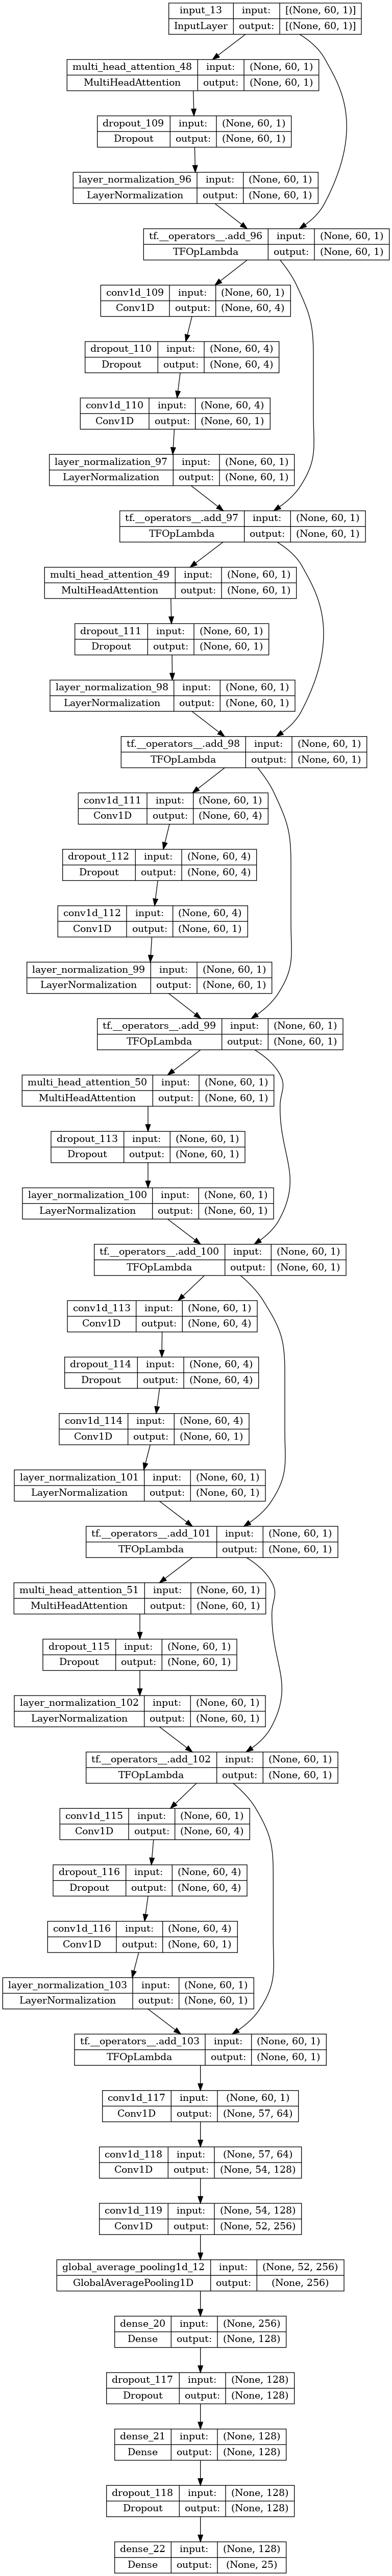

In [62]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [63]:
X_test.reshape(-1,60)

array([[ 3.29375000e+01,  0.00000000e+00, -9.91804352e+00, ...,
        -6.77068760e-01, -7.12267344e-01,  3.33886407e-01],
       [ 3.11250000e+01,  0.00000000e+00,  4.59396965e-01, ...,
         3.41793410e-02,  6.36932299e-02, -6.25506045e-02],
       [ 3.40625000e+01,  0.00000000e+00, -8.51492854e+00, ...,
        -1.56867003e-01, -1.38104346e-01, -3.25660942e-01],
       ...,
       [ 3.10625000e+01,  0.00000000e+00, -1.12269755e+01, ...,
        -6.26640817e-01, -6.89935292e-01,  2.66239854e-01],
       [ 3.36250000e+01,  0.00000000e+00, -7.74085306e+00, ...,
        -3.16754447e-01,  1.57844311e-01, -4.52800273e-01],
       [ 3.28656006e+01,  2.23408683e-02, -4.70229742e+00, ...,
         1.10599301e-01,  2.72528764e-01,  3.24068240e-01]])

In [64]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_test_reshaped.shape

(2355, 60)

In [66]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=64,
    callbacks=callbacks,
)
model.evaluate(X_test_reshaped, y_test )

Epoch 1/300
118/118 [==============================] - 2s 18ms/step - loss: 1.3021 - accuracy: 0.4952 - val_loss: 1.0429 - val_accuracy: 0.6529
Epoch 2/300
118/118 [==============================] - 2s 18ms/step - loss: 1.2201 - accuracy: 0.5267 - val_loss: 0.9766 - val_accuracy: 0.6513
Epoch 3/300
118/118 [==============================] - 2s 17ms/step - loss: 1.1562 - accuracy: 0.5503 - val_loss: 0.9289 - val_accuracy: 0.6831
Epoch 4/300
118/118 [==============================] - 2s 18ms/step - loss: 1.1008 - accuracy: 0.5729 - val_loss: 0.8929 - val_accuracy: 0.6821
Epoch 5/300
118/118 [==============================] - 2s 18ms/step - loss: 1.0597 - accuracy: 0.5895 - val_loss: 0.8407 - val_accuracy: 0.7028
Epoch 6/300
118/118 [==============================] - 2s 18ms/step - loss: 1.0156 - accuracy: 0.6058 - val_loss: 0.8095 - val_accuracy: 0.7166
Epoch 7/300
118/118 [==============================] - 2s 18ms/step - loss: 0.9870 - accuracy: 0.6127 - val_loss: 0.7946 - val_accuracy:

118/118 [==============================] - 2s 18ms/step - loss: 0.3285 - accuracy: 0.8979 - val_loss: 0.2638 - val_accuracy: 0.9151
Epoch 58/300
118/118 [==============================] - 2s 17ms/step - loss: 0.3116 - accuracy: 0.8983 - val_loss: 0.2541 - val_accuracy: 0.9151
Epoch 59/300
118/118 [==============================] - 2s 21ms/step - loss: 0.3149 - accuracy: 0.8998 - val_loss: 0.2415 - val_accuracy: 0.9209
Epoch 60/300
118/118 [==============================] - 2s 18ms/step - loss: 0.3077 - accuracy: 0.9052 - val_loss: 0.2507 - val_accuracy: 0.9188
Epoch 61/300
118/118 [==============================] - 2s 18ms/step - loss: 0.3005 - accuracy: 0.9054 - val_loss: 0.2439 - val_accuracy: 0.9177
Epoch 62/300
118/118 [==============================] - 2s 18ms/step - loss: 0.2900 - accuracy: 0.9063 - val_loss: 0.2603 - val_accuracy: 0.9103
Epoch 63/300
118/118 [==============================] - 2s 18ms/step - loss: 0.2980 - accuracy: 0.9067 - val_loss: 0.2420 - val_accuracy: 0.917

118/118 [==============================] - 2s 17ms/step - loss: 0.1639 - accuracy: 0.9509 - val_loss: 0.1282 - val_accuracy: 0.9570
Epoch 114/300
118/118 [==============================] - 2s 20ms/step - loss: 0.1627 - accuracy: 0.9489 - val_loss: 0.1277 - val_accuracy: 0.9570
Epoch 115/300
118/118 [==============================] - 2s 18ms/step - loss: 0.1523 - accuracy: 0.9502 - val_loss: 0.1327 - val_accuracy: 0.9517
Epoch 116/300
118/118 [==============================] - 2s 18ms/step - loss: 0.1510 - accuracy: 0.9521 - val_loss: 0.1191 - val_accuracy: 0.9591
Epoch 117/300
118/118 [==============================] - 2s 17ms/step - loss: 0.1538 - accuracy: 0.9521 - val_loss: 0.1269 - val_accuracy: 0.9586
Epoch 118/300
118/118 [==============================] - 2s 18ms/step - loss: 0.1511 - accuracy: 0.9543 - val_loss: 0.1248 - val_accuracy: 0.9597
Epoch 119/300
118/118 [==============================] - 2s 17ms/step - loss: 0.1503 - accuracy: 0.9531 - val_loss: 0.1154 - val_accuracy:

[0.07803525775671005, 0.9766454100608826]

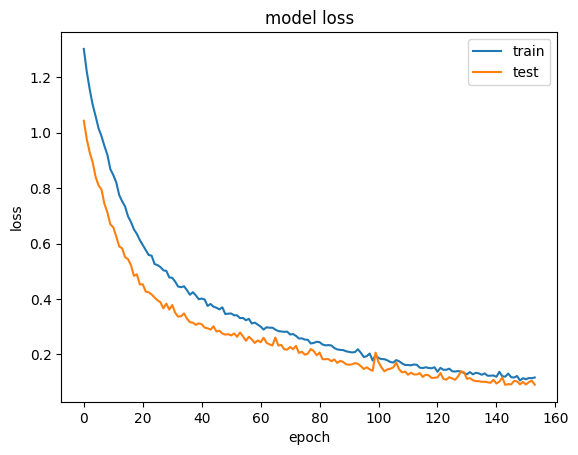

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

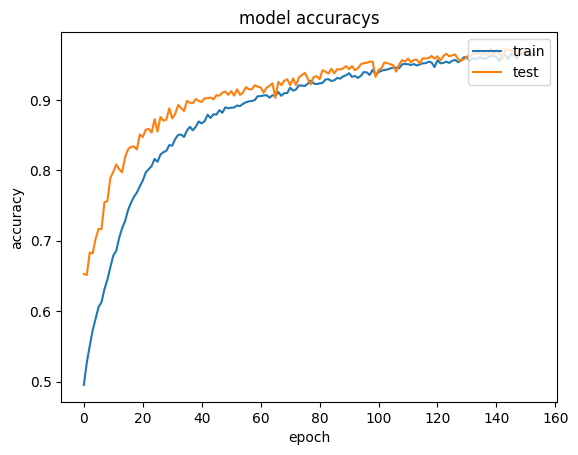

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracys')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

74/74 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       241
           2       0.96      0.91      0.94       232
           3       0.93      0.95      0.94       244
           4       1.00      1.00      1.00       305
           5       1.00      1.00      1.00       119
           6       0.98      0.99      0.99       207
           7       1.00      1.00      1.00       239
          12       0.98      1.00      0.99       104
          13       0.99      1.00      0.99        86
          16       0.97      0.95      0.96       220
          17       0.95      0.97      0.96       308
          24       1.00      0.98      0.99        50

    accuracy                           0.98      2355
   macro avg       0.98      0.98      0.98      2355
weighted avg       0.98      0.98      0.98      2355



(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

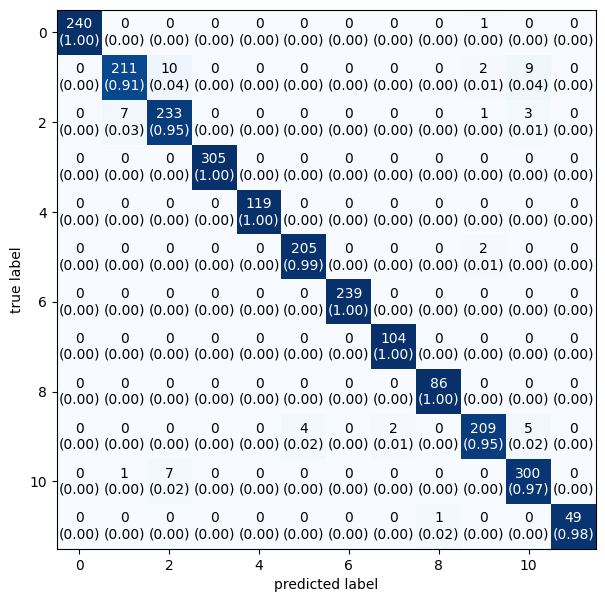

In [71]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
predict_x = model.predict(X_test_reshaped) 
y_pred_class= np.argmax(predict_x,axis=1)
# 다중 클래스 레이블로 변환
y_test_single_label = np.argmax(y_test, axis=1)

# 혼동 행렬 계산
mat = confusion_matrix(y_test_single_label, y_pred_class)

# 분류 보고서 출력
print(classification_report(y_test_single_label, y_pred_class))

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7, 7))


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score


print(accuracy_score(y_test_single_label, y_pred_class))
print('f1_score = ', f1_score(y_test_single_label, y_pred_class, average='weighted'))

0.9766454352441614
f1_score =  0.9765839177500977
